# Part 3: Clustering on Datasets following Dimensionality Reduction

In [1]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis

## Dimensionality Reduction on Car Dataset

In [2]:
wine_df = pd.read_csv("data/winequalityN.csv")
wine_df.head()

cleanup_wines = {"type":     {"white": 0, "red": 1}
                }
wine_df.replace(cleanup_wines,inplace = True)
wine_df = wine_df.dropna()

target = wine_df['quality']
target[target < 6] = 0
target[target >= 6] = 1
print(len(target))
print(target.value_counts())
wine_df.drop(['quality'],axis = 1,inplace = True)
wine_df.head()

X_train,X_test,Y_train,Y_test = train_test_split(wine_df, target, random_state=42)

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

storage = {
    'ica_kurt': [],
    'rp_kurt': [],
}


whole_dataset = np.concatenate((X_train_std,X_test_std),axis=0)
print(whole_dataset.shape)

6463
1    4091
0    2372
Name: quality, dtype: int64
(6463, 12)


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 w

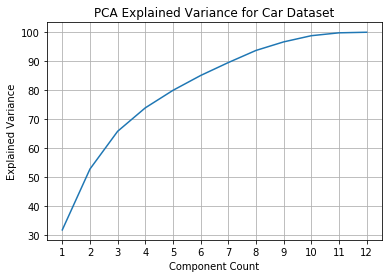

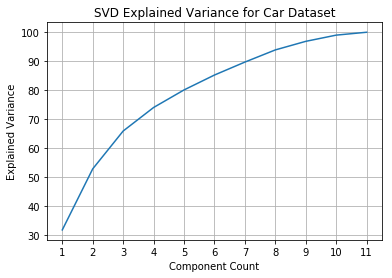

(6463, 2)


In [3]:
# PCA

car_pca = PCA()
car_reduced_X_train = car_pca.fit_transform(whole_dataset)

plt.figure()
plt.plot(np.arange(1,13), 100*np.cumsum(car_pca.explained_variance_ratio_))
plt.title('PCA Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,13))
plt.show()

# SVD

car_svd = TruncatedSVD(n_components=11)
car_reduced_X_train = car_svd.fit_transform(whole_dataset)

plt.figure()
plt.plot(np.arange(1,12), 100*np.cumsum(car_svd.explained_variance_ratio_))
plt.title('SVD Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,12))
plt.show()

#final datasets for nn 
pca_dataset = PCA(n_components=2).fit_transform(whole_dataset)
print(pca_dataset.shape)
svd_dataset = TruncatedSVD(n_components=3).fit_transform(whole_dataset)


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 12
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 12
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 12
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 12
  warnings.warn('n_components is too large: it wil

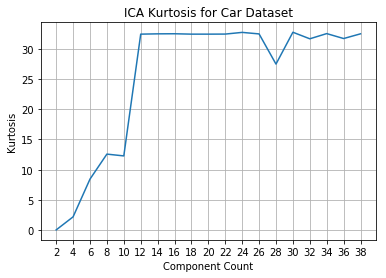

In [4]:
# ICA

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_ica = FastICA(n_components=i)
    car_reduced_X_train  = car_ica.fit_transform(whole_dataset)
    storage['ica_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))

plt.figure()
plt.plot(component_range, storage['ica_kurt'])
plt.title('ICA Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (12 < 14).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (12 < 16).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (12 < 18).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/

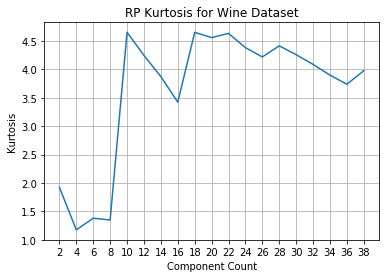

In [5]:
# RP

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_rp = GaussianRandomProjection(n_components=i, random_state=42)
    car_reduced_X_train  = car_rp.fit_transform(whole_dataset)
    storage['rp_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))

plt.figure()
plt.plot(component_range, storage['rp_kurt'])
plt.title('RP Kurtosis for Wine Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

#final datasets for nn 
rp_dataset = GaussianRandomProjection(n_components=10).fit_transform(whole_dataset)
ica_dataset = FastICA(n_components=12).fit_transform(whole_dataset)

## Clustering on Car Dataset

In [6]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score


### Clustering on PCA

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

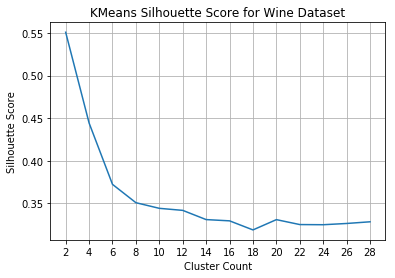

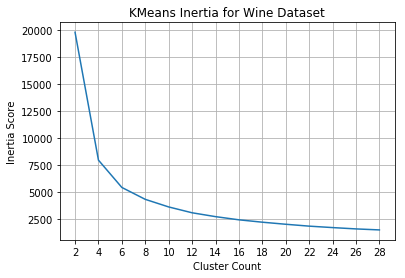

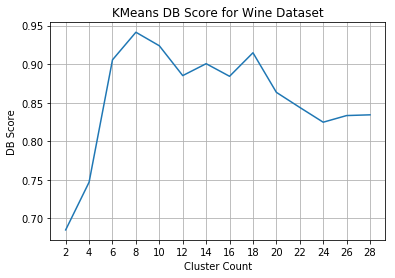

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

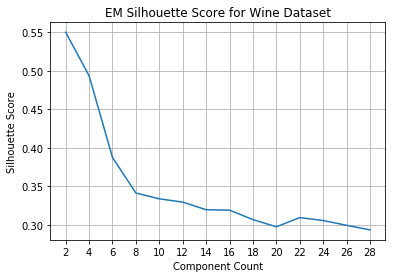

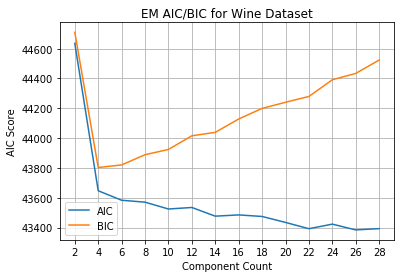

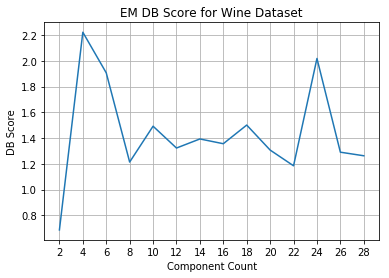

In [7]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(pca_dataset, km_model.fit_predict(pca_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(pca_dataset, km_model.fit_predict(pca_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Wine Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Wine Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Wine Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(pca_dataset)
    storage['bic_score'].append(em_model.bic(pca_dataset))
    storage['aic_score'].append(em_model.aic(pca_dataset))
    storage['silhouette_score'].append(silhouette_score(pca_dataset, em_model.fit_predict(pca_dataset)))
    storage['db_score'].append(davies_bouldin_score(pca_dataset, em_model.fit_predict(pca_dataset)))
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Wine Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'], label='AIC')
plt.plot(Component_range, storage['bic_score'], label='BIC')
plt.title('EM AIC/BIC for Wine Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.legend()
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Wine Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on SVD

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

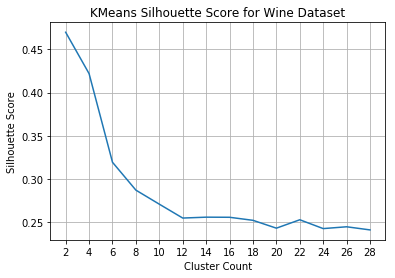

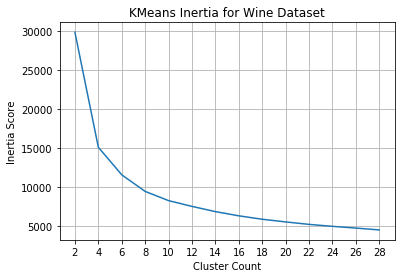

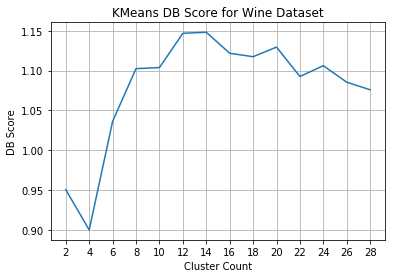

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

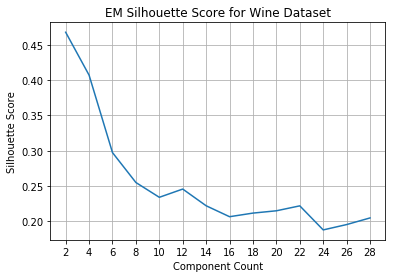

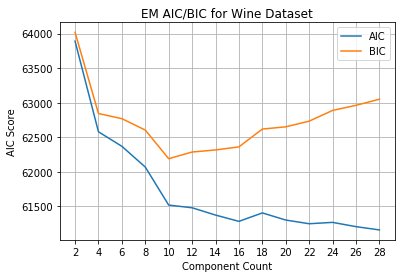

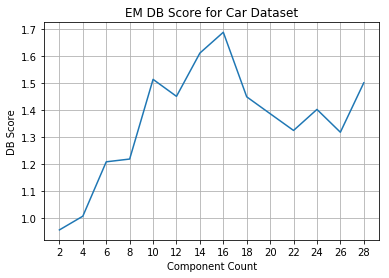

In [8]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(svd_dataset, km_model.fit_predict(svd_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(svd_dataset, km_model.fit_predict(svd_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Wine Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Wine Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Wine Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(svd_dataset)
    storage['bic_score'].append(em_model.bic(svd_dataset))
    storage['aic_score'].append(em_model.aic(svd_dataset))
    storage['silhouette_score'].append(silhouette_score(svd_dataset, em_model.fit_predict(svd_dataset)))
    storage['db_score'].append(davies_bouldin_score(svd_dataset, em_model.fit_predict(svd_dataset)))
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Wine Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'], label='AIC')
plt.plot(Component_range, storage['bic_score'], label='BIC')
plt.title('EM AIC/BIC for Wine Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.legend()
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on RP

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

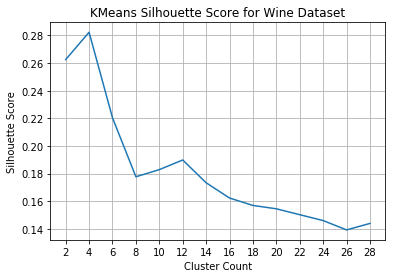

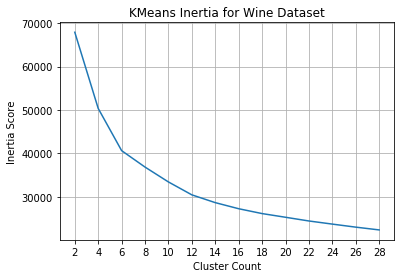

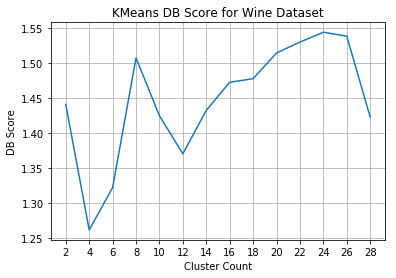

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

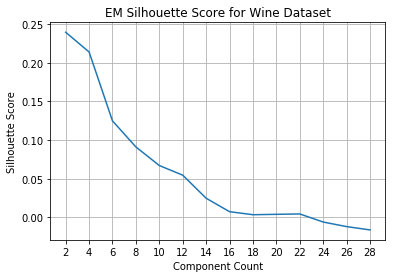

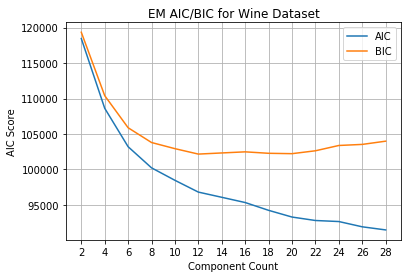

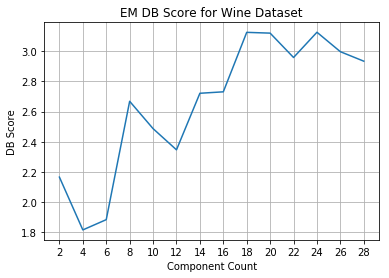

In [9]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(rp_dataset, km_model.fit_predict(rp_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(rp_dataset, km_model.fit_predict(rp_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Wine Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Wine Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Wine Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(rp_dataset)
    storage['bic_score'].append(em_model.bic(rp_dataset))
    storage['aic_score'].append(em_model.aic(rp_dataset))
    storage['silhouette_score'].append(silhouette_score(rp_dataset, em_model.fit_predict(rp_dataset)))
    storage['db_score'].append(davies_bouldin_score(rp_dataset, em_model.fit_predict(rp_dataset)))
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Wine Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'], label='AIC')
plt.plot(Component_range, storage['bic_score'], label='BIC')
plt.title('EM AIC/BIC for Wine Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Wine Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on ICA

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

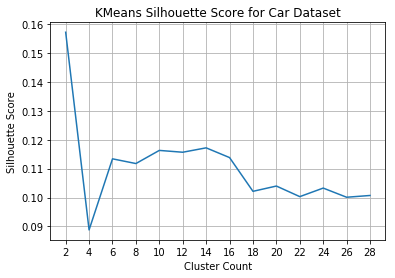

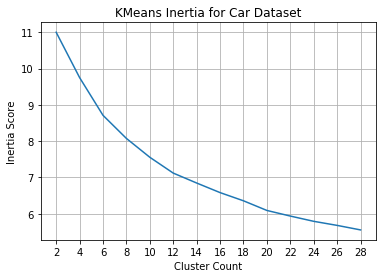

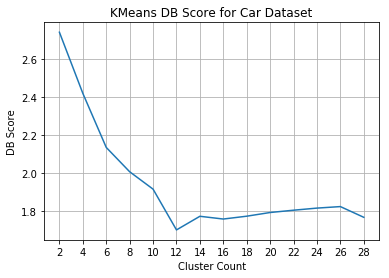

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

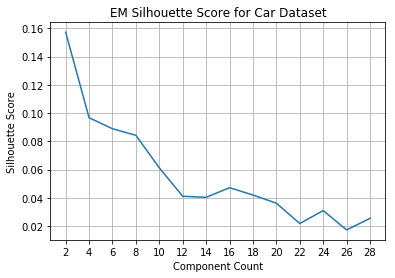

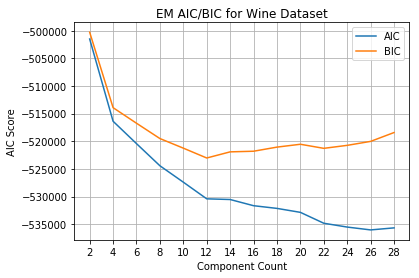

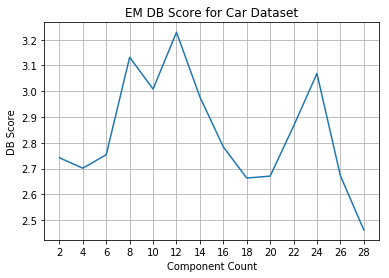

In [10]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(ica_dataset, km_model.fit_predict(ica_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(ica_dataset, km_model.fit_predict(ica_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(ica_dataset)
    storage['bic_score'].append(em_model.bic(ica_dataset))
    storage['aic_score'].append(em_model.aic(ica_dataset))
    storage['silhouette_score'].append(silhouette_score(ica_dataset, em_model.fit_predict(ica_dataset)))
    storage['db_score'].append(davies_bouldin_score(ica_dataset, em_model.fit_predict(ica_dataset)))
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'], label='AIC')
plt.plot(Component_range, storage['bic_score'], label='BIC')
plt.title('EM AIC/BIC for Wine Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.legend()
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()